## Web Crawling in Python

https://machinelearningmastery.com/web-crawling-in-python/

In the last few decades, it was a tedious job to collect data, and it was sometimes very expensive since dealing with the expensive tools and time constrain as well. We know that Machine learning projects cannot live without data. Luckily, we have a lot of data on the web at our disposal nowadays. We can copy/ get data from the web to create our dataset. We can manually download files and save them to the disk. But we can do it more efficiently by automating the data harvesting. There are several tools in Python that can assist for the automation purposes.

Fro this lab session, you will learn:

- How to use the requests library to read online data using HTTP
- How to read tables on web pages using pandas
- How to use Selenium to emulate browser operations

### Overview

This tutorial is divided into three parts; they are:

1. Using the requests library
2. Reading tables on the web using pandas
3. Reading dynamic content with Selenium

### Using the Requests Library

When we talk about writing a Python program to read from the web, it is inevitable that we can’t avoid the requests library. You need to install it (as well as BeautifulSoup and lxml that we will cover later):

In [1]:
pip install requests beautifulsoup4 lxml

Note: you may need to restart the kernel to use updated packages.


It provides you with an interface that allows you to interact with the web easily.

The very simple use case would be to read a web page from a URL:

200
<!doctype html><html dir="ltr" lang="en-US"><head>
      <meta data-react-helmet="true" charset="utf-8"/><meta data-react-helmet="true" name="viewport" content="width=device-width, initial-scale=1, viewport-fit=cover"/><meta data-react-helmet="true" name="robots" content="max-image-preview:large"/><meta data-react-helmet="true" name="robots" content="index, follow"/><meta data-react-helmet="true" name="referrer" content="origin"/><meta data-react-helmet="true" name="description" content="Today’s and tonight’s Kuantan, Pahang, Malaysia weather forecast, weather conditions and Doppler radar from The Weather Channel and Weather.com"/><meta data-react-helmet="true" name="msapplication-TileColor" content="#ffffff"/><meta data-react-helmet="true" name="msapplication-TileImage" content="/daybreak-today/assets/ms-icon-144x144.d353af.png"/><meta data-react-helmet="true" name="theme-color" content="#ffffff"/><meta data-react-helmet="true" name="apple-itunes-app" content="app-id=295646461"/><
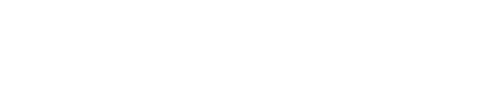

In [5]:
# Using requests library

import requests
 
# Today weather of Kuantan, Pahang
URL = "https://weather.com/weather/today/l/6ac6c3bd42db249939530153bb5fe1a2a329333cad38263d801484edea6217f1"
resp = requests.get(URL)
print(resp.status_code)
print(resp.text)

If you’re familiar with HTTP, you can probably recall that a status code of 200 means the request is successfully fulfilled. Then we can read the response. In the above, we read the textual response and get the HTML of the web page. Should it be a CSV or some other textual data, we can get them in the text attribute of the response object. For example, this is how we can read a CSV from the Federal Reserve Economics Data:

In [4]:
import io
import pandas as pd
import requests
 
URL = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=T10YIE&cosd=2017-04-14&coed=2022-04-14"
if resp.status_code == 200:
    csvtext = resp.text
    csvbuffer = io.StringIO(csvtext)
    df = pd.read_csv(csvbuffer)
    print(df)

ParserError: Error tokenizing data. C error: Expected 12 fields in line 18, saw 14106


If the data is in the form of JSON, we can read it as text or even let requests decode it for you. For example, the following is to pull some data from GitHub in JSON format and convert it into a Python dictionary:

In [6]:
import requests
 
URL = "https://api.github.com/users/kunaim8986"

resp = requests.get(URL)
if resp.status_code == 200:
    data = resp.json()
    print(data)

{'login': 'kunaim8986', 'id': 73801939, 'node_id': 'MDQ6VXNlcjczODAxOTM5', 'avatar_url': 'https://avatars.githubusercontent.com/u/73801939?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/kunaim8986', 'html_url': 'https://github.com/kunaim8986', 'followers_url': 'https://api.github.com/users/kunaim8986/followers', 'following_url': 'https://api.github.com/users/kunaim8986/following{/other_user}', 'gists_url': 'https://api.github.com/users/kunaim8986/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/kunaim8986/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/kunaim8986/subscriptions', 'organizations_url': 'https://api.github.com/users/kunaim8986/orgs', 'repos_url': 'https://api.github.com/users/kunaim8986/repos', 'events_url': 'https://api.github.com/users/kunaim8986/events{/privacy}', 'received_events_url': 'https://api.github.com/users/kunaim8986/received_events', 'type': 'User', 'site_admin': False, 'name': 'Ku Muhammad Naim Ku Khal

But if the URL gives you some binary data, such as a ZIP file or a JPEG image, you need to get them in the content attribute instead, as this would be the binary data. For example, this is how we can download an image (the logo of Wikipedia):

In [7]:
import requests
 
URL = "https://en.wikipedia.org/static/images/project-logos/enwiki.png"

#https://en.wikipedia.org/static/images/project-logos/enwiki.png
wikilogo = requests.get(URL)
if wikilogo.status_code == 200:
    with open("enwiki.png", "wb") as fp:
        fp.write(wikilogo.content)      


Given we already obtained the web page, how should we extract the data? This is beyond what the requests library can provide to us, but we can use a different library to help. There are two ways we can do it, depending on how we want to specify the data.

The first way is to consider the HTML as a kind of XML document and use the XPath language to extract the element. In this case, we can make use of the lxml library to first create a document object model (DOM) and then search by XPath:

In [8]:
import requests
 
URL = "https://en.wikipedia.org/static/images/project-logos/enwiki.png"
wikilogo = requests.get(URL)
if wikilogo.status_code == 200:
    with open("enwiki.png", "wb") as fp:
        fp.write(wikilogo.content)      

In [9]:
wikilogo

<Response [200]>

In [10]:
from lxml import etree
 
# Create DOM from HTML text
dom = etree.HTML(resp.text)
# Search for the temperature element and get the content
elements = dom.xpath("//span[@data-testid='TemperatureValue' and contains(@class,'CurrentConditions')]")

#<span data-testid="TemperatureValue" class="CurrentConditions--tempValue--MHmYY">76°</span>

# <span data-testid="TemperatureValue" class="CurrentConditions--tempValue--MHmYY">82°</span>

In [11]:
print(elements[0].text) 

IndexError: list index out of range

XPath is a string that specifies how to find an element. The lxml object provides a function xpath() to search the DOM for elements that match the XPath string, which can be multiple matches. The XPath above means to find an HTML element anywhere with the <span> tag and with the attribute data-testid matching “TemperatureValue” and class beginning with “CurrentConditions.” We can learn this from the developer tools of the browser (e.g., the Chrome screenshot below) by inspecting the HTML source.

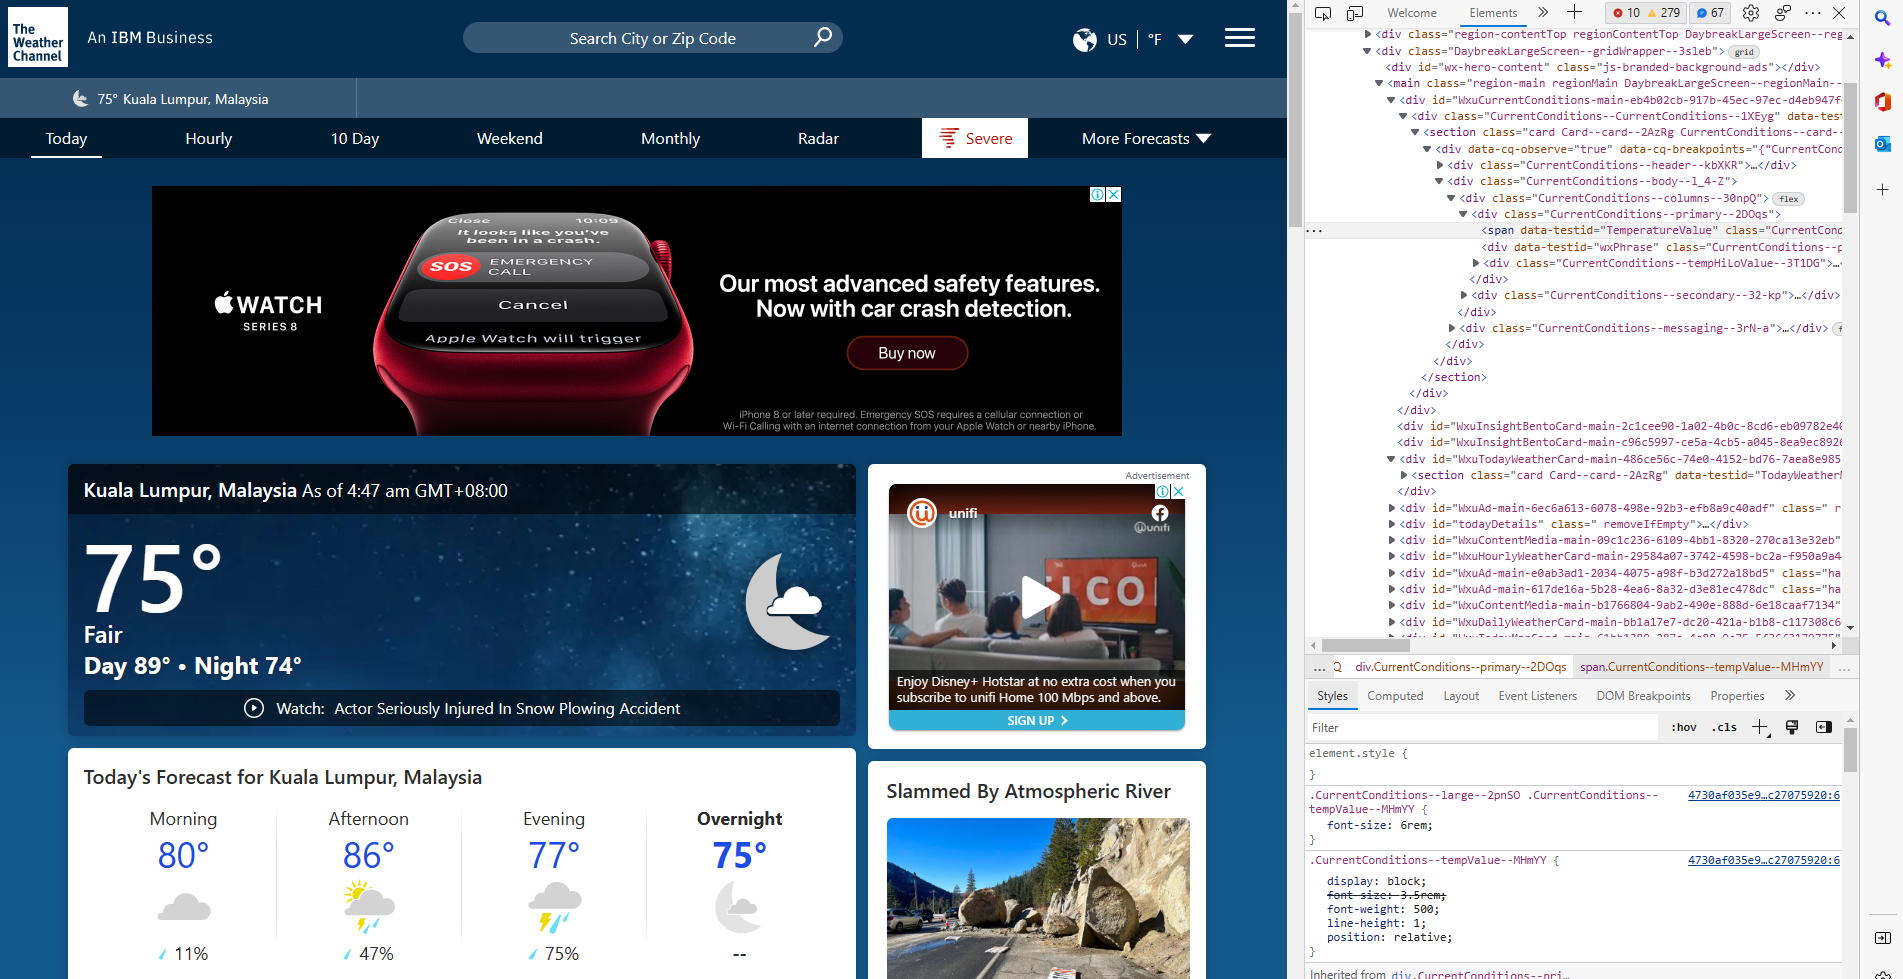

This example is to find the temperature of Kuala Lumpur City, provided by this particular element we get from this web page. We know the first element matched by the XPath is what we need, and we can read the text inside the <span> tag.

The other way is to use CSS selectors on the HTML document, which we can make use of the BeautifulSoup library:

In the above, we first pass our HTML text to BeautifulSoup. BeautifulSoup supports various HTML parsers, each with different capabilities. In the above, we use the lxml library as the parser as recommended by BeautifulSoup (and it is also often the fastest). CSS selector is a different mini-language, with pros and cons compared to XPath. The selector above is identical to the XPath we used in the previous example. Therefore, we can get the same temperature from the first matched element.

The following is a complete code to print the current temperature of Kuantan according to the real-time information on the web:

In [12]:
import requests
from lxml import etree

import bs4
 
# Reading temperature of Kuantan. Pahang
URL = "https://weather.com/weather/today/l/6ac6c3bd42db249939530153bb5fe1a2a329333cad38263d801484edea6217f1"
resp = requests.get(URL)
 
if resp.status_code == 200:
    # Using lxml
    dom = etree.HTML(resp.text)
    elements = dom.xpath("//span[@data-testid='TemperatureValue' and contains(@class,'CurrentConditions')]")
    print(elements[0].text)
 
    # Using BeautifulSoup
    soup = bs4.BeautifulSoup(resp.text, "lxml") # import bs4
    elements = soup.select('span[data-testid="TemperatureValue"][class^="CurrentConditions"]')
    print(elements[0].text)
    
    
    
# <span data-testid="TemperatureValue" class="CurrentConditions--tempValue--MHmYY">80°</span>

84
84°


As you can imagine, you can collect a time series of the temperature by running this script on a regular schedule. Similarly, we can collect data automatically from various websites. This is how we can obtain data for our machine learning projects.

### Reading Tables on the Web Using Pandas

Very often, web pages will use tables to carry data. If the page is simple enough, we may even skip inspecting it to find out the XPath or CSS selector and use pandas to get all tables on the page in one shot. It is simple enough to be done in one line:

In [13]:
import pandas as pd
 
tables = pd.read_html("https://en.wikipedia.org/wiki/Data-mining")
print(tables)

[                                                    0
0                                 Part of a series on
1                    Machine learning and data mining
2   Paradigms Supervised learning Unsupervised lea...
3   Problems Classification Generative model Regre...
4   Supervised learning (classification • regressi...
5   Clustering BIRCH CURE Hierarchical k-means Fuz...
6   Dimensionality reduction Factor analysis CCA I...
7   Structured prediction Graphical models Bayes n...
8   Anomaly detection RANSAC k-NN Local outlier fa...
9   Artificial neural network Autoencoder Cognitiv...
10  Reinforcement learning Q-learning SARSA Tempor...
11  Learning with humans Active learning Crowdsour...
12                   Model diagnostics Learning curve
13  Mathematical foundations Kernel machines Bias–...
14  Machine-learning venues ECML PKDD NeurIPS ICML...
15  Related articles Glossary of artificial intell...
16  .mw-parser-output .navbar{display:inline;font-...,                           

### Reading Dynamic Content With Selenium

A significant portion of modern-day web pages is full of JavaScripts. This gives us a fancier experience but becomes a hurdle to use as a program to extract data. One example is Yahoo’s home page, which, if we just load the page and find all news headlines, there are far fewer than what we can see on the browser:

In [14]:
import requests
 
# Read Yahoo home page
URL = "https://www.yahoo.com/"
resp = requests.get(URL)
dom = etree.HTML(resp.text)
 
# Print news headlines
elements = dom.xpath("//h3/a[u[@class='StretchedBox']]")
for elem in elements:
    print(etree.tostring(elem, method="text", encoding="unicode"))

Trump legal news brief: Oregon punts on removing Trump from ballot until after U.S. Supreme Court weighs in
Patriots reportedly hiring Jerod Mayo to replace Bill Belichick as head coach
Who is Jerod Mayo, the man replacing Bill Belichick as Patriots head coach?
The best laptops of CES 2024
How to watch the 75th Emmy Awards: Time, channel, full nominee list and more
The 50+ best Amazon Winter Sale deals to shop this weekend: Get up to 75% off laptops, Apple AirPods and more
The 40+ best deals at Walmart's secret sale this weekend — save up to 80% on HP, Shark, Samsung and more
Apple Vision Pro pre-orders require a FaceID scan with an iPhone or iPad
Patriots' split with Bill Belichick likely ends the NFL era of autocratic 'everything' coaches
The best of CES 2024
How to watch the Miami Dolphins vs. Kansas City Chiefs game tonight on Peacock
Sources: NCAA levies significant penalties on Florida State for NIL recruiting violations
A comprehensive list of 2023 & 2024 tech layoffs
What is a 

This is because web pages like this rely on JavaScript to populate the content. Famous web frameworks such as AngularJS or React are behind powering this category. The Python library, such as requests, does not understand JavaScript. Therefore, you will see the result differently. If the data you want to fetch from the web is one of them, you can study how the JavaScript is invoked and mimic the browser’s behavior in your program. But this is probably too tedious to make it work.

The other way is to ask a real browser to read the web page rather than using requests. This is what Selenium can do. Before we can use it, we need to install the library:

pip install selenium

But Selenium is only a framework to control browsers. You need to have the browser installed on your computer as well as the driver to connect Selenium to the browser. If you intend to use Chrome, you need to download and install ChromeDriver too. You need to put the driver in the executable path so that Selenium can invoke it like a normal command. For example, in Linux, you just need to get the chromedriver executable from the ZIP file downloaded and put it in /usr/local/bin.

Similarly, if you’re using Firefox, you need the GeckoDriver. For more details on setting up Selenium, you should refer to its documentation.

Afterward, you can use a Python script to control the browser behavior. For example:

In [15]:
import time
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
 
# Launch Chrome browser in headless mode
options = webdriver.ChromeOptions()
options.add_argument("headless")
browser = webdriver.Chrome(options=options)
 
# Load web page
browser.get("https://www.yahoo.com")
# Network transport takes time. Wait until the page is fully loaded
def is_ready(browser):
    return browser.execute_script(r"""
        return document.readyState === 'complete'
    """)
WebDriverWait(browser, 30).until(is_ready)
 
# Scroll to bottom of the page to trigger JavaScript action
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(1)
WebDriverWait(browser, 30).until(is_ready)
 
# Search for news headlines and print
elements = browser.find_elements(By.XPATH, "//h3/a[u[@class='StretchedBox']]")
for elem in elements:
    print(elem.text)
 
# Close the browser once finish
browser.close()

Trump legal news brief: Oregon punts on removing Trump from ballot until after U.S. Supreme Court weighs in
Patriots reportedly hiring Jerod Mayo to replace Bill Belichick as head coach
Who is Jerod Mayo, the man replacing Bill Belichick as Patriots head coach?
The best laptops of CES 2024
How to watch the 75th Emmy Awards: Time, channel, full nominee list and more
The 50+ best Amazon Winter Sale deals to shop this weekend: Get up to 75% off laptops, Apple AirPods and more
The 40+ best deals at Walmart's secret sale this weekend — save up to 80% on HP, Shark, Samsung and more
Apple Vision Pro pre-orders require a FaceID scan with an iPhone or iPad
Patriots' split with Bill Belichick likely ends the NFL era of autocratic 'everything' coaches
The best of CES 2024
How to watch the Miami Dolphins vs. Kansas City Chiefs game tonight on Peacock
Sources: NCAA levies significant penalties on Florida State for NIL recruiting violations
A comprehensive list of 2023 & 2024 tech layoffs
What is a 

The above code works as follows. We first launch the browser in headless mode, meaning we ask Chrome to start but not display on the screen. This is important if we want to run our script remotely as there may not be any GUI support. Note that every browser is developed differently, and thus the options syntax we used is specific to Chrome. If we use Firefox, the code would be this instead:

In [16]:
options = webdriver.FirefoxOptions()
options.set_headless()
browser = webdriver.Firefox(firefox_options=options)

AttributeError: 'Options' object has no attribute 'set_headless'

After we launch the browser, we give it a URL to load. But since it takes time for the network to deliver the page, and the browser will take time to render it, we should wait until the browser is ready before we proceed to the next operation. We detect if the browser has finished rendering by using JavaScript. We make Selenium run a JavaScript code for us and tell us the result using the execute_script() function. We leverage Selenium’s WebDriverWait tool to run it until it succeeds or until a 30-second timeout. As the page is loaded, we scroll to the bottom of the page so the JavaScript can be triggered to load more content. Then we wait for one second unconditionally to make sure the browser triggered the JavaScript, then wait until the page is ready again. Afterward, we can extract the news headline element using XPath (or alternatively using a CSS selector). Because the browser is an external program, we are responsible for closing it in our script.

Using Selenium is different from using the requests library in several aspects. First, you never have the web content in your Python code directly. Instead, you refer to the browser’s content whenever you need it. Hence the web elements returned by the find_elements() function refer to objects inside the external browser, so we must not close the browser before we finish consuming them. Secondly, all operations should be based on browser interaction rather than network requests. Thus you need to control the browser by emulating keyboard and mouse movements. But in return, you have the full-featured browser with JavaScript support. For example, you can use JavaScript to check the size and position of an element on the page, which you will know only after the HTML elements are rendered.

There are a lot more functions provided by the Selenium framework that we can cover here. It is powerful, but since it is connected to the browser, using it is more demanding than the requests library and much slower. Usually, this is the last resort for harvesting information from the web.